In [7]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [8]:
#Reading CSV file
consumerData = pd.read_csv('Consumer_Complaints.csv', dtype = object)

## Plot for issues in the companies

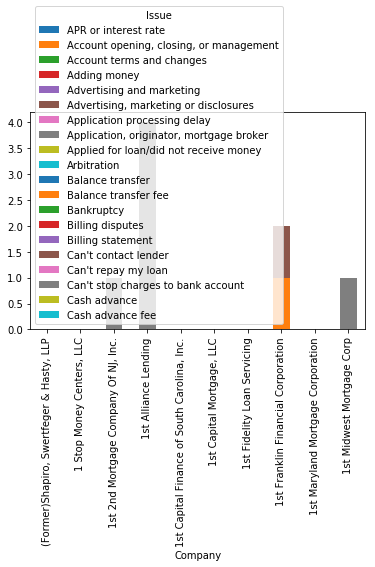

In [9]:
pd.crosstab(consumerData.Company, consumerData.Issue).ix[:10, :20].plot(kind='bar', stacked=True)

## Plot for most issues in the companies

In [4]:
x=pd.crosstab(consumerData.Issue, consumerData.Company)
new=pd.DataFrame()
for row in x:
    new = new.append(pd.DataFrame({'Company': [row], 'Issue' : x[row].idxmax(), 'IssueFrequency' : x[row].max()}), ignore_index=True)


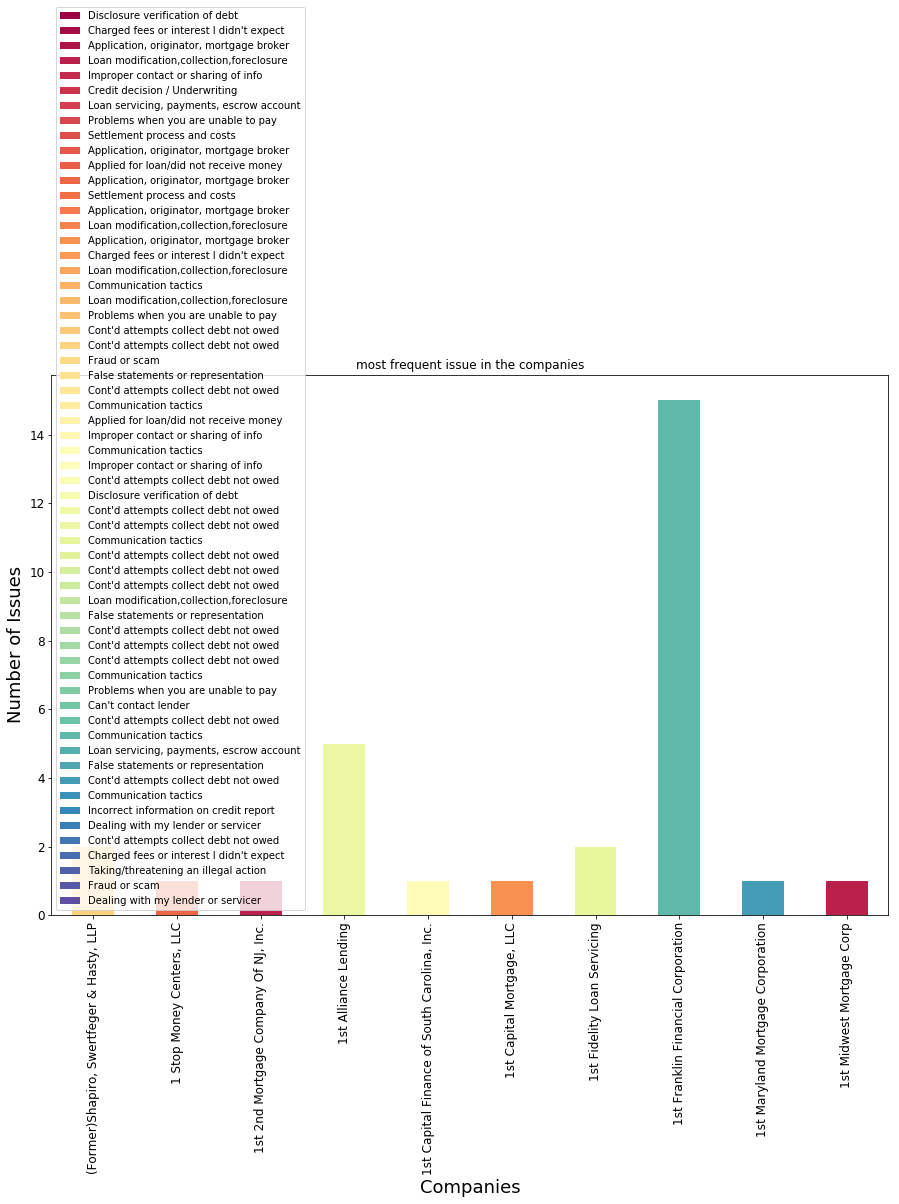

In [11]:
plot_data = new.set_index(['Company', 'Issue']).unstack().fillna(0).ix[:10, :]
ax = plot_data.plot(kind = 'bar', stacked=True, title='most frequent issue in the companies', colormap='Spectral',
               figsize = (15,10),legend = True, fontsize = 12)
legend = ax.legend(new['Issue'])
legend.draggable(state=True)
ax.set_xlabel("Companies",fontsize = 18)
ax.set_ylabel("Number of Issues",fontsize = 18)
plt.show()


## Plot for consumer response to solution provided

In [21]:
consumerData['consumer_reaction'] = consumerData['Consumer disputed?'].map({'Yes':1, 'No':0}).fillna(0)

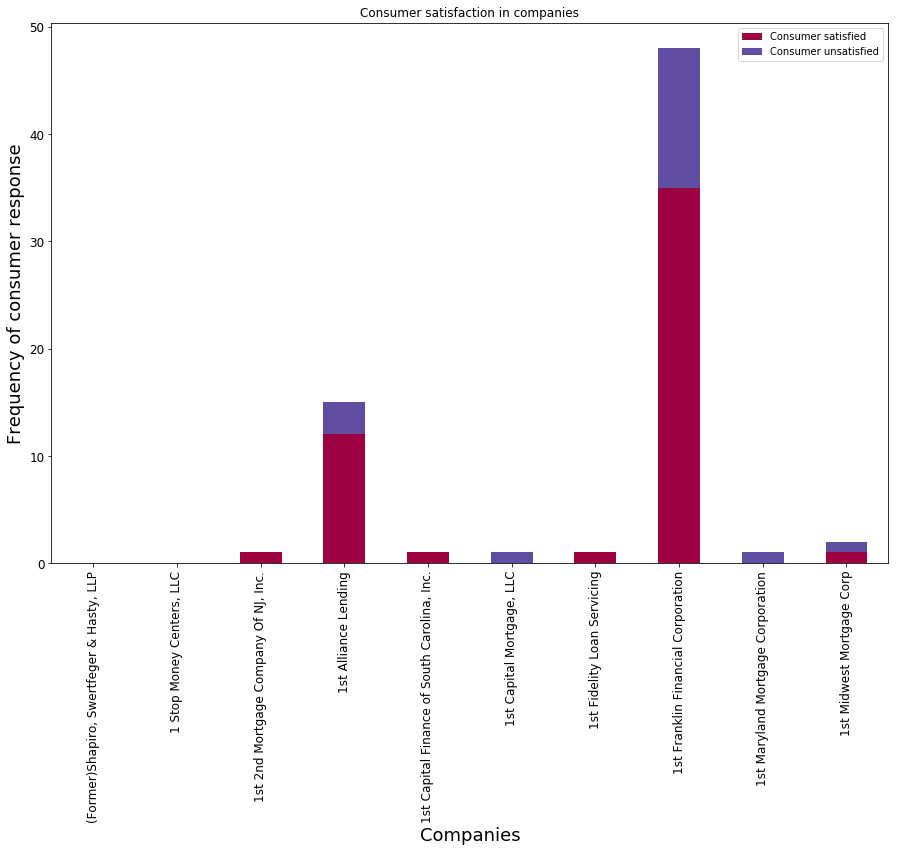

In [44]:
plot_data = pd.get_dummies(consumerData, columns=['Consumer disputed?']).groupby('Company').sum().iloc[:,1:].head(10)
ax = plot_data.plot(kind = 'bar', stacked=True, title='Consumer satisfaction in companies', colormap='Spectral',
               figsize = (15,10),legend = True, fontsize = 12)
legend = ax.legend(['Consumer satisfied', 'Consumer unsatisfied'])
legend.draggable(state=True)
ax.set_xlabel("Companies",fontsize = 18)
ax.set_ylabel("Frequency of consumer response",fontsize = 18)
plt.show()


## Plot for customers unsatisfied with response 

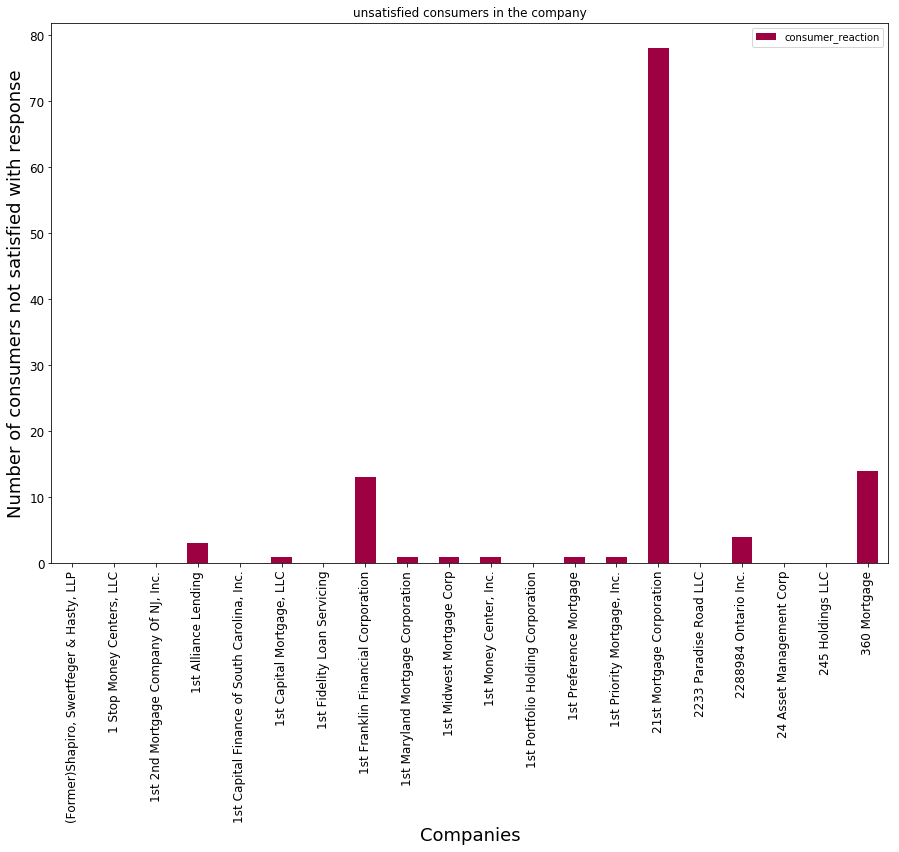

In [28]:
plot_data = consumerData.groupby('Company').sum().head(20)
ax = plot_data.plot(kind = 'bar', stacked=True, title='unsatisfied consumers in the company', colormap='Spectral',
               figsize = (15,10),legend = True, fontsize = 12)
legend = ax.legend()
legend.draggable(state=True)
ax.set_xlabel("Companies",fontsize = 18)
ax.set_ylabel("Number of consumers not satisfied with response",fontsize = 18)
plt.show()

